Accuracy: 0.9014128728414442
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.84      1074
           1       0.90      0.96      0.93      2111

    accuracy                           0.90      3185
   macro avg       0.90      0.87      0.89      3185
weighted avg       0.90      0.90      0.90      3185



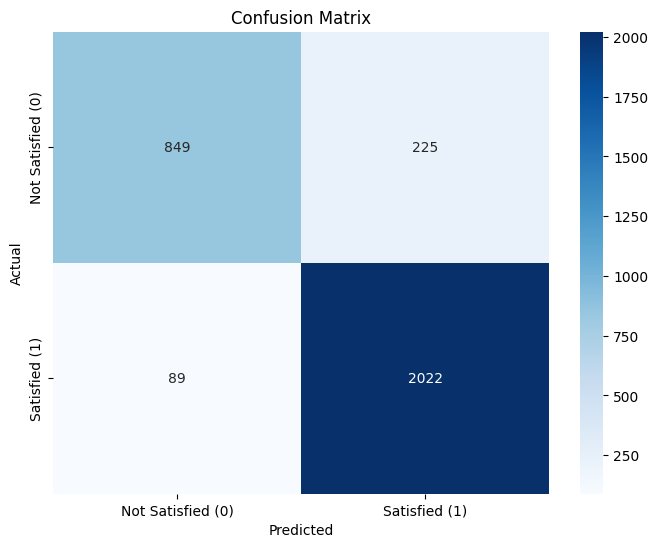

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Customer-survey-data.csv'  # Update with your file path if needed
data = pd.read_csv(file_path)

# Rename columns for easier access
data.columns = [
    'Customer',
    'Overall_Delivery_Satisfaction',
    'Food_Quality_Satisfaction',
    'Delivery_Speed_Satisfaction',
    'Order_Accuracy'
]

# Fill missing values in satisfaction columns with median
data.fillna(data[['Overall_Delivery_Satisfaction', 'Food_Quality_Satisfaction', 'Delivery_Speed_Satisfaction']].median(), inplace=True)

# Create Satisfaction Average and Binary variables
data['Satisfaction_Average'] = data[['Overall_Delivery_Satisfaction', 'Food_Quality_Satisfaction', 'Delivery_Speed_Satisfaction']].mean(axis=1)
data['Satisfaction_Binary'] = (data['Satisfaction_Average'] >= 3).astype(int)

# Introduce random noise by flipping some of the target labels
np.random.seed(42)
n_samples = len(data)
noise_factor = int(0.1 * n_samples)  # 10% of the samples to be altered
indices_to_flip = np.random.choice(n_samples, noise_factor, replace=False)

# Flip the labels in the target variable
for index in indices_to_flip:
    data.loc[index, 'Satisfaction_Binary'] = 1 - data.loc[index, 'Satisfaction_Binary']

# Select features and target variable for logistic regression
X = data[['Overall_Delivery_Satisfaction', 'Food_Quality_Satisfaction', 'Delivery_Speed_Satisfaction']]
y = data['Satisfaction_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Calculate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Satisfied (0)', 'Satisfied (1)'], yticklabels=['Not Satisfied (0)', 'Satisfied (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [16]:
log_reg.predict([[4,3,2]])

c:\Users\saloj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])